In [15]:
import sklearn as sl
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'1.2.2'

In [16]:
from pandas import read_csv

# Carregando os dados
arquivo = 'dados/pima-data-banceled.csv'
dados = read_csv(arquivo)

In [17]:
# Distribuição das classes
dados.groupby('class').size()

class
0    268
1    268
dtype: int64

In [18]:
# Import dos módulos
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import csv

In [19]:
# Separando o array em componentes de input e output
array = dados.values
X = array[:,0:8]
Y = array[:,9]

In [20]:
from sklearn.preprocessing import StandardScaler

# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Padronizados: \n\n", standardX[0:5,:])

Dados Originais: 

 [[4.77e+02 7.00e+00 1.14e+02 ... 4.66e-01 3.10e+01 0.00e+00]
 [3.64e+02 4.00e+00 1.47e+02 ... 3.85e-01 3.00e+01 0.00e+00]
 [1.12e+02 1.00e+00 8.90e+01 ... 1.92e-01 2.30e+01 0.00e+00]
 ...
 [7.59e+02 6.00e+00 1.90e+02 ... 2.78e-01 6.60e+01 1.00e+00]
 [7.61e+02 9.00e+00 1.70e+02 ... 4.03e-01 4.30e+01 1.00e+00]
 [7.66e+02 1.00e+00 1.26e+02 ... 3.49e-01 4.70e+01 1.00e+00]]

Dados Binarizados: 

 [[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1.]]


In [21]:
X = standardX

In [23]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# field names 
fields = ['Tipo','Modelo', 'Descrição Modelo', 'Acurária'] 
    
# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('RF', RandomForestClassifier(n_estimators=100)))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

with open('resultados/resultados.csv', 'a') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
    #write.writerow(fields)

    # Construção dos Modelos
    for nome, modelo in modelos:
        kfold = KFold(n_splits = num_folds, shuffle=True, random_state = seed)
        cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
        resultados.append(cv_results)
        nomes.append(nome)
        msg = "%s - %s: %f (%f)" % (nome, modelo, cv_results.mean(), cv_results.std())
        print(msg)

        # data rows of csv file 
        rows = [['StandardScaler', nome, modelo, cv_results.mean(), cv_results.std() ] ]
        write.writerows(rows)
    
    # Close the file object
    f.close()


LR - LogisticRegression(): 0.505765 (0.072758)
LDA - LinearDiscriminantAnalysis(): 0.502027 (0.072213)
NB - GaussianNB(): 0.496261 (0.073216)
KNN - KNeighborsClassifier(): 0.505556 (0.075881)
CART - DecisionTreeClassifier(): 0.479455 (0.068337)
SVM - SVC(): 0.485010 (0.072420)


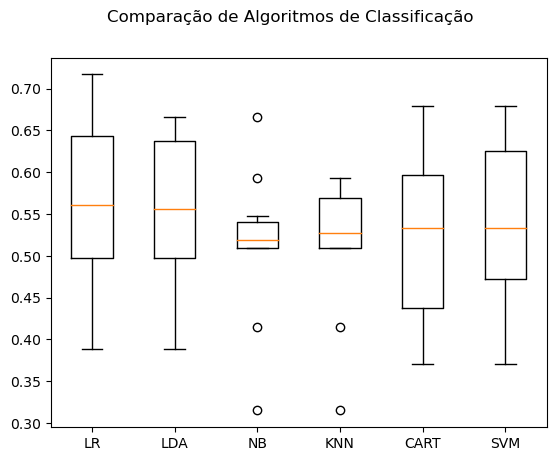

In [14]:
# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)

plt.savefig("graficos/Normalizacao_StandardScaler.png")

plt.show()